# TP1 : Génération de variables aléatoires

## G3 SDI - Estimation Avancée

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée.
* Dans un premier temps, on suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par `np.random.rand`). À partir de ce générateur, le but sera de générer des échantillons d'autres lois avec des méthodes simples, notamment la méthode de la transformée inverse.
* Dans un deuxième temps, on étudiera des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance).

Pour chaque question, **justifier brièvement la solution puis l'implémenter**. **Comparer avec la densité théorique** à l'aide d'histogrammes ou de KDE.

### Instructions

1. Renommez votre notebook sous la forme `tp1_Nom1_Nom2.ipynb`. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposez votre notebook sur Moodle dans la section prévue à cet effet avant la date limite.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Compte-rendu écrit par AMORRI Farah, MILANO Olivia, 25/11/2025.
</div>

In [1]:
# Importing usual libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

### Exercice 1 - Pour commencer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Si 
U
∼
U
(
0
,
1
)
U∼U(0,1), alors une variable définie par :
X
=
a
+
(
b
−
a
)
U
X=a+(b−a)U
suit une loi uniforme sur 
[
a
,
b
]
[a,b].
</div>

In [15]:
import numpy as np

def uniform_ab(N, a, b, seed):
    np.random.seed(seed)
    U = np.random.rand(N)  # N échantillons de U(0,1)
    X = a + (b - a) * U    # transformation linéaire
    return X




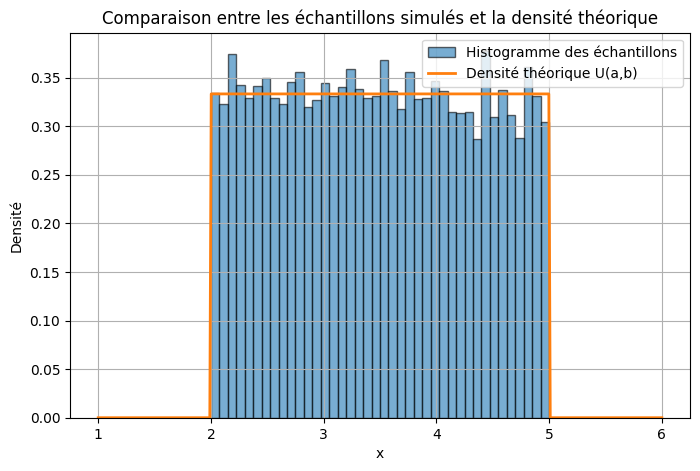

In [7]:
# Verification 

import numpy as np
import matplotlib.pyplot as plt

# ----- Paramètres -----
N = 10000
a, b = 2, 5

# ----- Génération -----
samples = uniform_ab(10000, a=2, b=5)

# ----- Densité théorique -----
x_vals = np.linspace(a - 1, b + 1, 400)
density = np.where((x_vals >= a) & (x_vals <= b), 1/(b - a), 0)

# ----- Tracé -----
plt.figure(figsize=(8, 5))

# Histogramme normalisé
plt.hist(samples, bins=40, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons')

# Densité théorique
plt.plot(x_vals, density, linewidth=2, label='Densité théorique U(a,b)')

plt.title('Comparaison entre les échantillons simulés et la densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [16]:
def uniform_rectangle(N, a, b, c, d):
    X = uniform_ab(N, a, b, seed=42)   # coordonnée X
    Y = uniform_ab(N, c, d, seed=43)   # coordonnée Y
    return X, Y

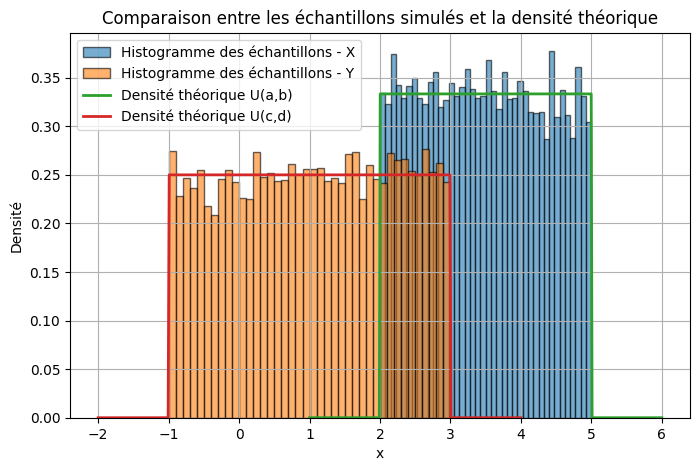

In [17]:
#Paramètres 
a = 2 
b = 5 
c = -1
d = 3

N = 10000

# Génération
X, Y = uniform_rectangle(N, a=2, b=5, c=-1, d=3)

# Densité théorique 
x_vals = np.linspace(a - 1, b + 1, 400)
y_vals = np.linspace(c - 1, d + 1, 400)
density_X = np.where((x_vals >= a) & (x_vals <= b), 1/(b - a), 0)
density_Y = np.where((y_vals >= c) & (y_vals <= d), 1/(d - c), 0)


# ----- Tracé -----
plt.figure(figsize=(8, 5))

# Histogramme normalisé
plt.hist(X, bins=40, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons - X')
plt.hist(Y, bins=40, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons - Y')
# Densité théorique
plt.plot(x_vals, density_X, linewidth=2, label='Densité théorique U(a,b)')
plt.plot(y_vals, density_Y, linewidth=2, label='Densité théorique U(c,d)')



plt.title('Comparaison entre les échantillons simulés et la densité théorique')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/7x/5z5j8nzn73j56x9hr4346d_80000gn/T/ipykernel_59902/501123235.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


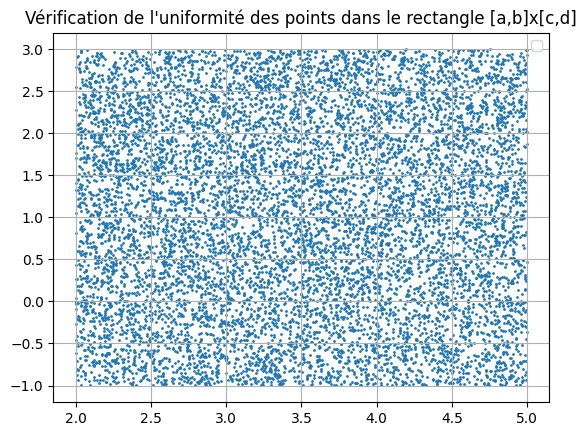

In [20]:
plt.scatter(X, Y, s=1)
plt.legend()
plt.title("Vérification de l'uniformité des points dans le rectangle [a,b]x[c,d]")
plt.grid(True)
plt.show()

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons de loi uniforme discrète sur $\{1, ..., K\}$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [22]:
def discrete_uniform_randint(N, K, seed):
    np.random.seed(seed)
    return np.random.randint(1, K+1, size=N)

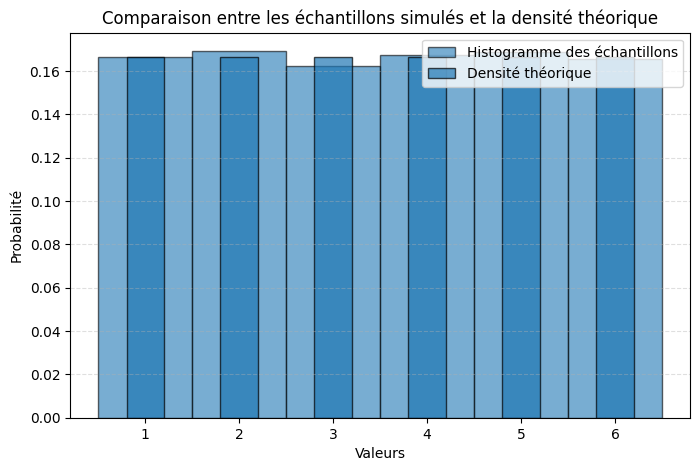

In [24]:
#Paramètres 
N = 10000
K = 6

#Generation 
samples = discrete_uniform_randint(N,K, seed=42)

#Density
theoretical = np.ones(K) / K
indices = np.arange(1, K+1)

# ----- Tracé -----
plt.figure(figsize=(8, 5))

# Histogramme discret
plt.hist(samples, bins=np.arange(1, K+2)-0.5, density=True,
         alpha=0.6, edgecolor='black', label='Histogramme des échantillons')

# Densité théorique (barplot)
plt.bar(indices, theoretical, width=0.4, alpha=0.7, 
        label='Densité théorique', edgecolor='black')

plt.title('Comparaison entre les échantillons simulés et la densité théorique')
plt.xlabel('Valeurs')
plt.ylabel('Probabilité')
plt.xticks(indices)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Exercice 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de $\mathbb{R}$ dans $[0,1]$, et "càdlàg", mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1],~F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux). On a la proposition suivante :


Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).


Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction $F^{-1}$, on peut simuler de n'importe quelle variable aléatoire réelle à partir d'un échantillon de loi uniforme.

**Q1**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

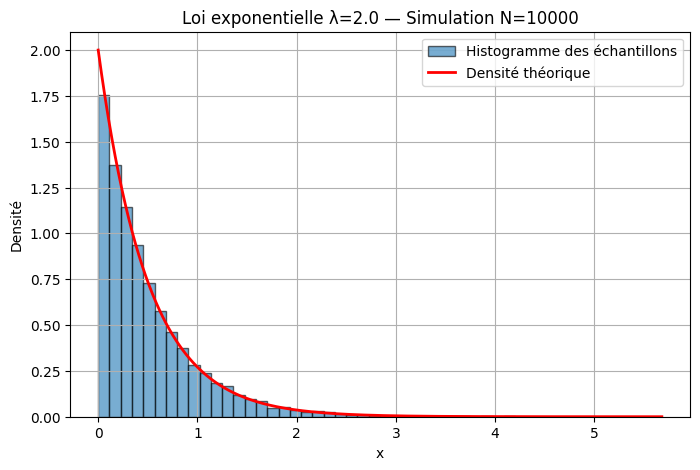

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Paramètres -----
N = 10000
lambda_ = 2.0

np.random.seed(42)  # pour reproductibilité

# ----- Simulation via transformée inverse -----
U = np.random.rand(N)
X = -np.log(U) / lambda_  # échantillons exponentiels

# ----- Densité théorique -----
x_vals = np.linspace(0, X.max(), 500)
density = lambda_ * np.exp(-lambda_ * x_vals)

# ----- Tracé -----
plt.figure(figsize=(8,5))
plt.hist(X, bins=50, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons')
plt.plot(x_vals, density, 'r', linewidth=2, label='Densité théorique')
plt.title(f'Loi exponentielle λ={lambda_} — Simulation N={N}')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


**Q2**. Quelles sont d'après vous les limitations de la méthode de la transformée inverse ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

### Exercice 3 - Méthode de Box-Müller

On a la proposition suivante :


Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.
    
Alors $X = \sqrt{R} \cos(\Theta)$ et $Y = \sqrt{R} \sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.


Cette méthode est connue comme la méthode de **Box-Müller** (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

**Q1 (Bonus)**. Montrer la proposition.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

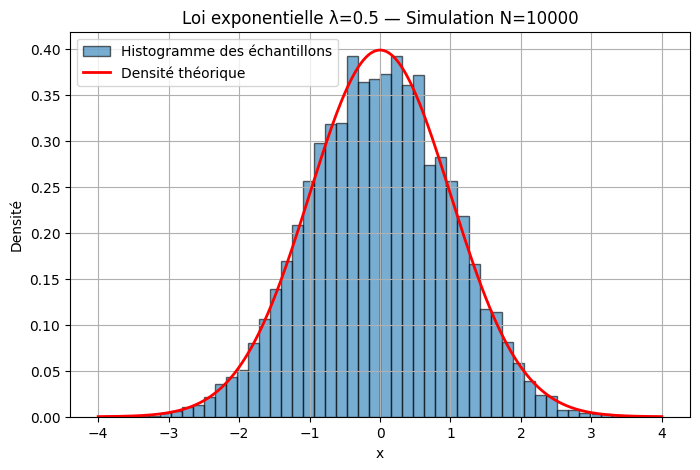

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
N = 10000
lambda_ = 1/2

 # pour reproductibilité

# Simulation via transformée inverse 
np.random.seed(42) 
U = np.random.rand(N)
theta = uniform_ab(N,0, 2*np.pi, seed=43)
R = -np.log(U) / lambda_  # échantillons exponentiels
X = np.sqrt(R) * np.cos(theta)




# Densité théorique 
x_vals = np.linspace(-4, 4, 500)
density = norm.pdf(x_vals, loc=0, scale=1)

# ----- Tracé -----
plt.figure(figsize=(8,5))
plt.hist(X, bins=50, density=True, alpha=0.6, edgecolor='black', label='Histogramme des échantillons')
plt.plot(x_vals, density, 'r', linewidth=2, label='Densité théorique')
plt.title(f'Loi exponentielle λ={lambda_} — Simulation N={N}')
plt.xlabel('x')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()


**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$.

À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = \mathbf{m} + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que la complexité associée à cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser `np.linalg.cholesky`.

In [ ]:
########
### YOUR CODE HERE
########

### Exercice 4 - Acceptation-Rejet (*Rejection sampling*)

**Q1**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expliquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = \beta = 0.5$ ?

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########

**Q2**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}_d(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser `scipy.stats.cdf`.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########

### Exercice 5 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'esimtateur de Monte Carlo de $\pi$.
* Générer $N_s = 10000$ échantillons, puis représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en ne gardant que les $N$ premiers. Quel résultat fondamental est-on en train d'illustrer ?
* Faire 1000 simulations de l'estimation par Monte Carlo de $\pi$ avec $N_s = 10000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur de Monte Carlo donné par le TCL.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########

### Exercice 6 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ avec $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard".
* Simuler $1000$ fois $N_s = 10000$ échantillons, et calculer la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard.
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $1000$ fois $N_s = 10000$ échantillons, et calculer la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Commenter.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Votre réponse ici
</div>

In [ ]:
########
### YOUR CODE HERE
########